In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from copy import deepcopy as copy

In [4]:
from IPython.display import Latex
from IPython.display import Math

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','Output']
df = pd.read_csv(url, names=names)

In [6]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
#pre-processing data
df.shape

(32561, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'Output'],
      dtype='object')

In [9]:
df.describe()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Missing Values:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educationNum,0
maritalStatus,0
occupation,0
relationship,0
race,0
sex,0


In [11]:
df = df.dropna(how='any')
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
#The above statment drops Nan rows. Few values for columns contain value ' ?'. This is a junk data, this data is removed by using below code.

In [13]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.rename(columns={'Output': 'Income'}, inplace=True)
df.head(0)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [15]:
df = df[(df.workclass != ' ?' ) & (df.education != ' ?') & (df.maritalStatus != ' ?' ) & (df.occupation != ' ?') & (df.relationship != ' ?') & (df.race != ' ?') & (df.sex != ' ?') & (df.nativeCountry != ' ?')]

In [16]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educationNum,0
maritalStatus,0
occupation,0
relationship,0
race,0
sex,0


In [18]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
df.head(0)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [20]:
df.shape

(30162, 15)

In [21]:
df['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 30162, dtype: object>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   workclass      30162 non-null  object
 2   fnlwgt         30162 non-null  int64 
 3   education      30162 non-null  object
 4   educationNum   30162 non-null  int64 
 5   maritalStatus  30162 non-null  object
 6   occupation     30162 non-null  object
 7   relationship   30162 non-null  object
 8   race           30162 non-null  object
 9   sex            30162 non-null  object
 10  capitalGain    30162 non-null  int64 
 11  capitalLoss    30162 non-null  int64 
 12  hoursPerWeek   30162 non-null  int64 
 13  nativeCountry  30162 non-null  object
 14  Income         30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [24]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['maritalStatus'] = le.fit_transform(df['maritalStatus'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['nativeCountry'] = le.fit_transform(df['nativeCountry'])
df['Income'] = le.fit_transform(df['Income'])

<ipython-input-24-c92ba4f2d734>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = le.fit_transform(df['workclass'])
<ipython-input-24-c92ba4f2d734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = le.fit_transform(df['education'])
<ipython-input-24-c92ba4f2d734>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [25]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [26]:
df['nativeCountry'].unique()

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

In [27]:
#Data Visualisation
import seaborn as sns

In [29]:
g = sns.pairplot(df)
g.fig.set_size_inches(40,40)

Output hidden; open in https://colab.research.google.com to view.

<Figure size 2000x1000 with 0 Axes>

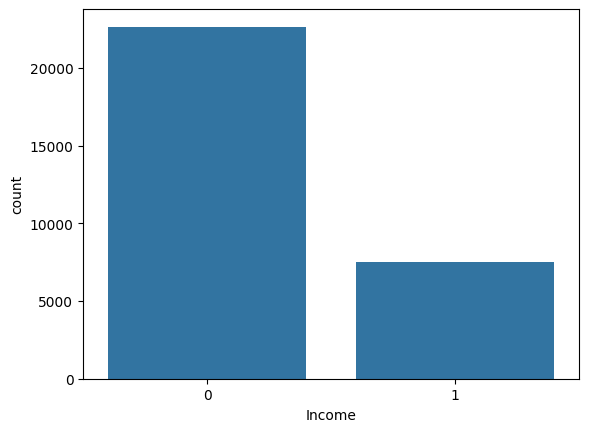

<Figure size 2000x1000 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
sns.countplot(x="Income", data=df)
plt.figure(figsize=(20,10))

In [32]:
#The proportion of records having income less than 50K dollars is more than the proportion of records having more than 50k dollars.

In [33]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


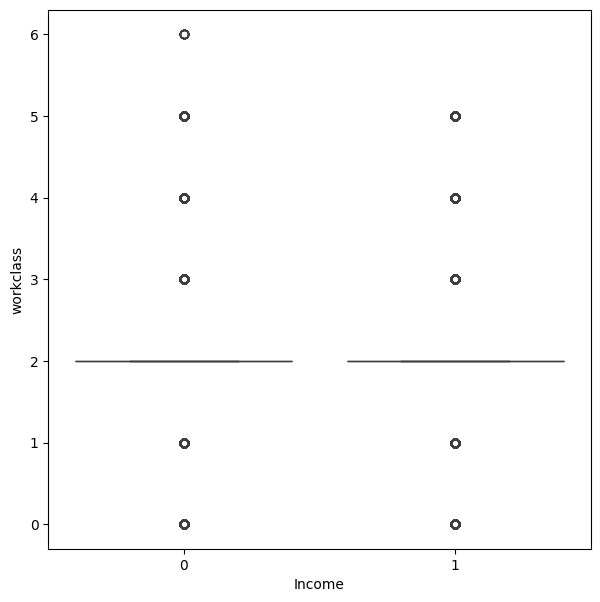

In [34]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="workclass",x='Income', data=df)

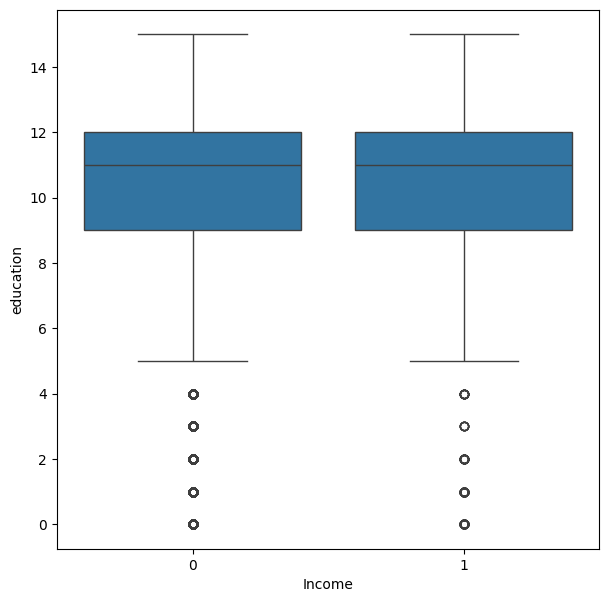

In [35]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="education",x='Income', data=df)

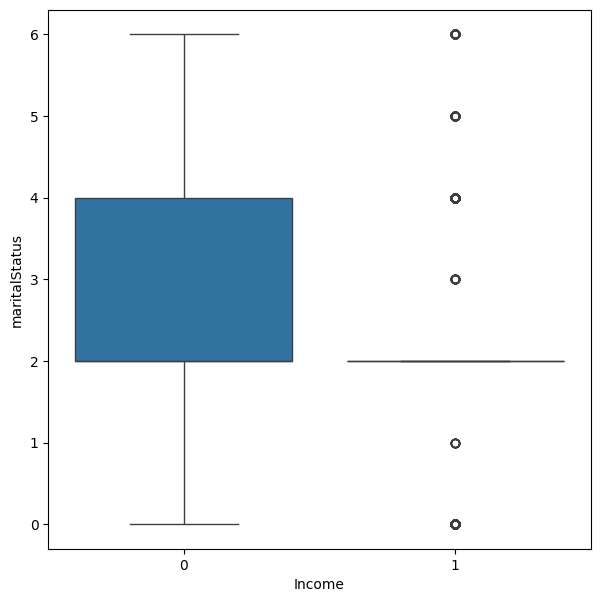

In [36]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(y="maritalStatus",x='Income', data=df)

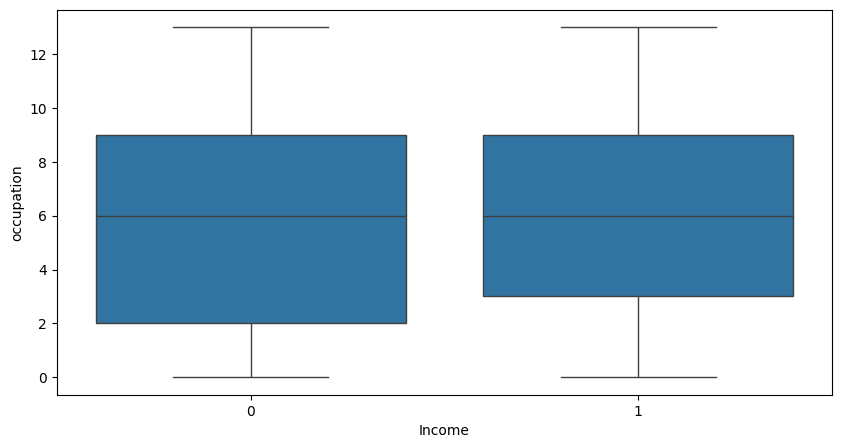

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="occupation",x='Income', data=df)

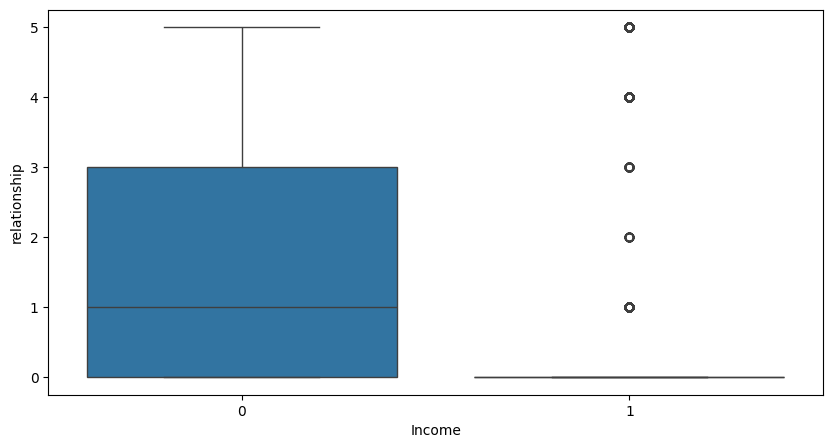

In [38]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='Income', data=df)

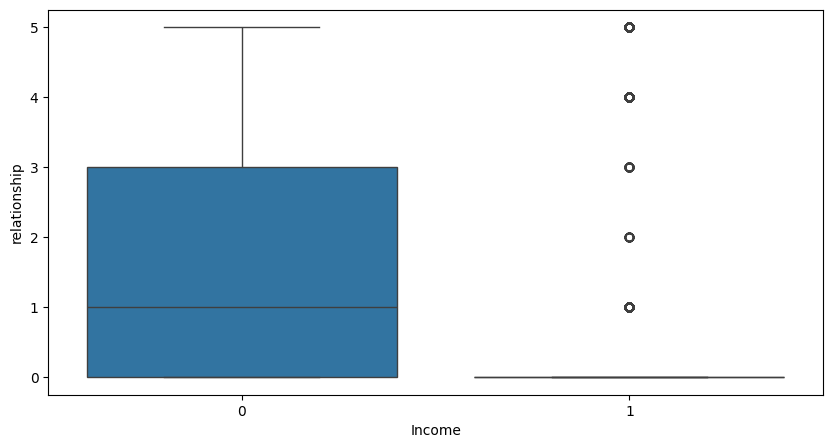

In [39]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='Income', data=df)

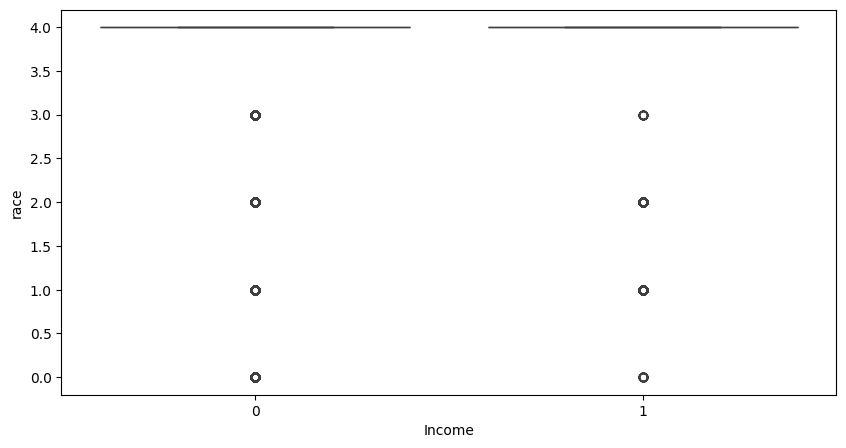

In [40]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="race",x='Income', data=df)

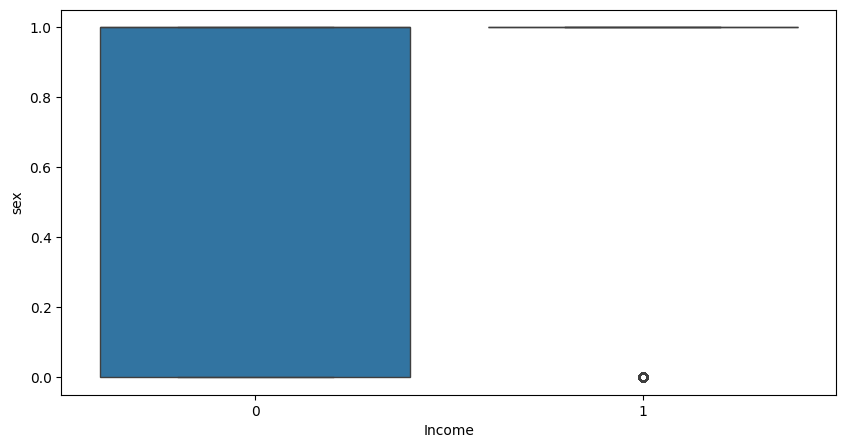

In [41]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="sex",x='Income', data=df)

In [42]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


<ipython-input-43-9bf451ece590>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
<ipython-input-43-9bf451ece590>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
<ipython-input-43-9bf451ece590>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
<ipython-input-43-9bf451ece590>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
<ipython-input-43-9bf451ece590>:12: UserWarning: set_ticklabels() sho

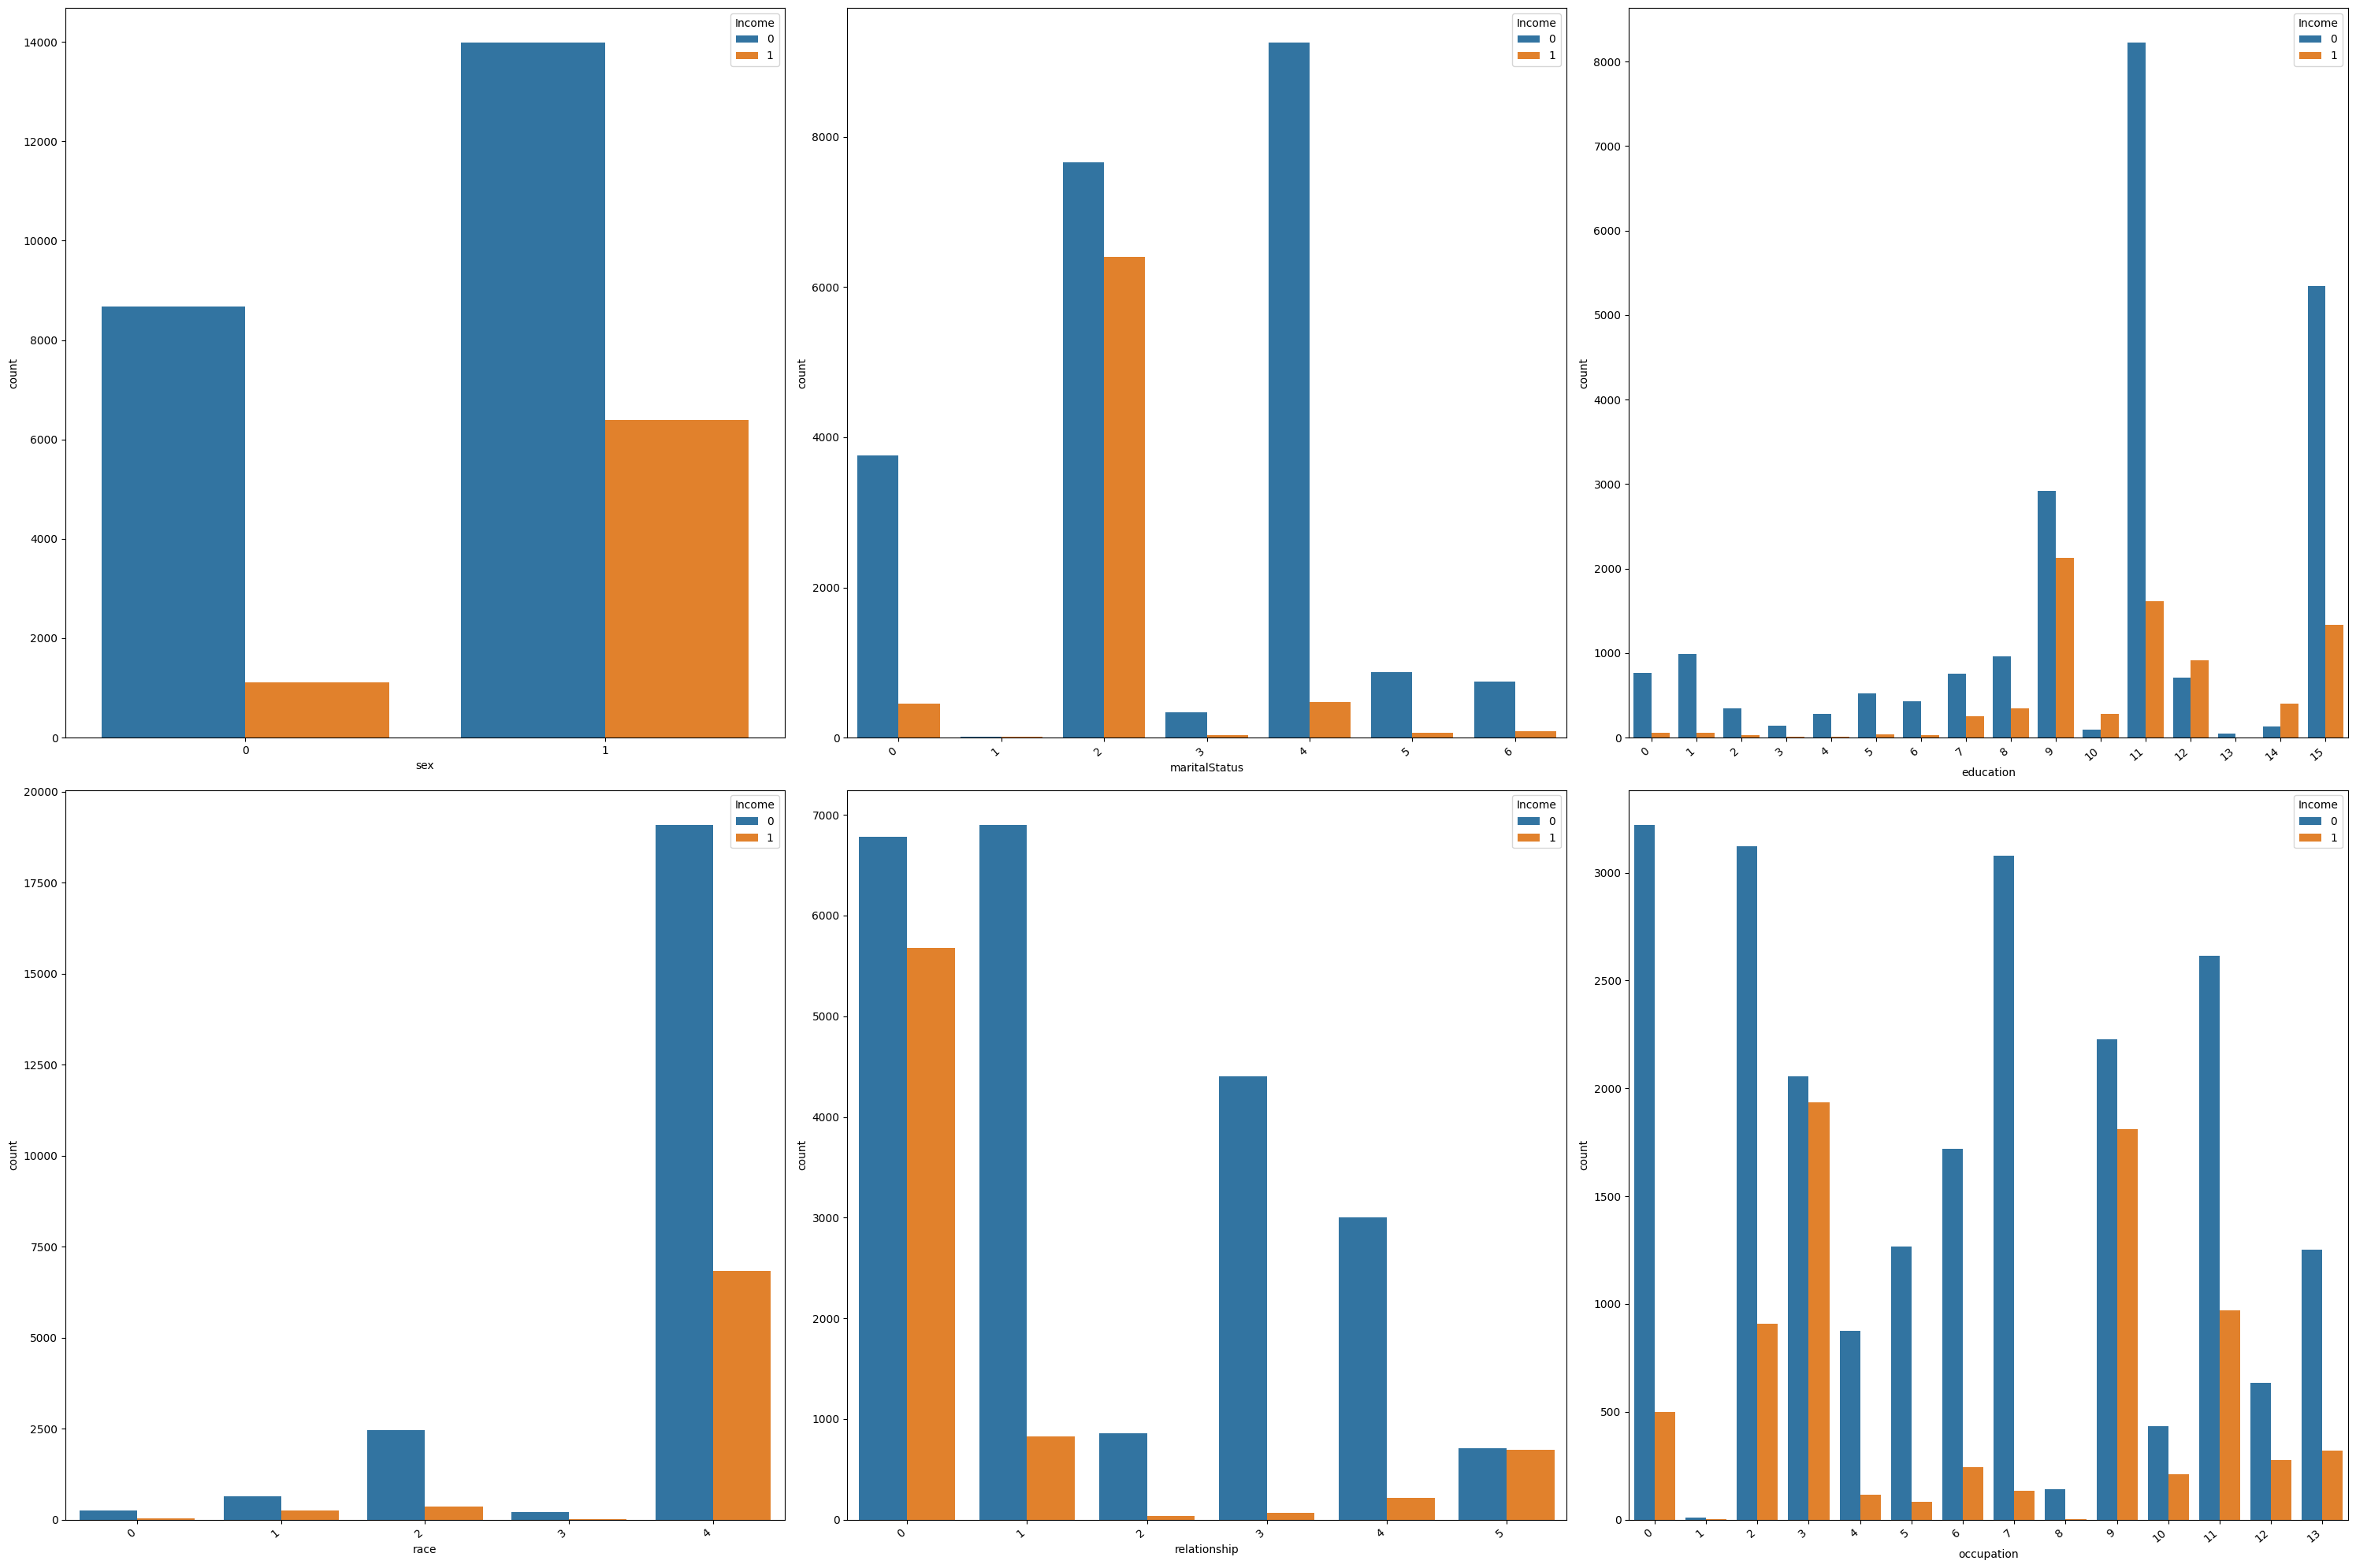

In [43]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=df,hue="Income",ax = ax[0][0])
cp = sns.countplot(x="maritalStatus", data=df,hue="Income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=df,hue="Income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=df,hue="Income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=df,hue="Income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=df,hue="Income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

,0
age,"Axes(0.125,0.712609;0.168478x0.167391)"
workclass,"Axes(0.327174,0.712609;0.168478x0.167391)"
fnlwgt,"Axes(0.529348,0.712609;0.168478x0.167391)"
education,"Axes(0.731522,0.712609;0.168478x0.167391)"
maritalStatus,"Axes(0.125,0.511739;0.168478x0.167391)"
occupation,"Axes(0.327174,0.511739;0.168478x0.167391)"
relationship,"Axes(0.529348,0.511739;0.168478x0.167391)"
race,"Axes(0.731522,0.511739;0.168478x0.167391)"
sex,"Axes(0.125,0.31087;0.168478x0.167391)"
capitalGain,"Axes(0.327174,0.31087;0.168478x0.167391)"


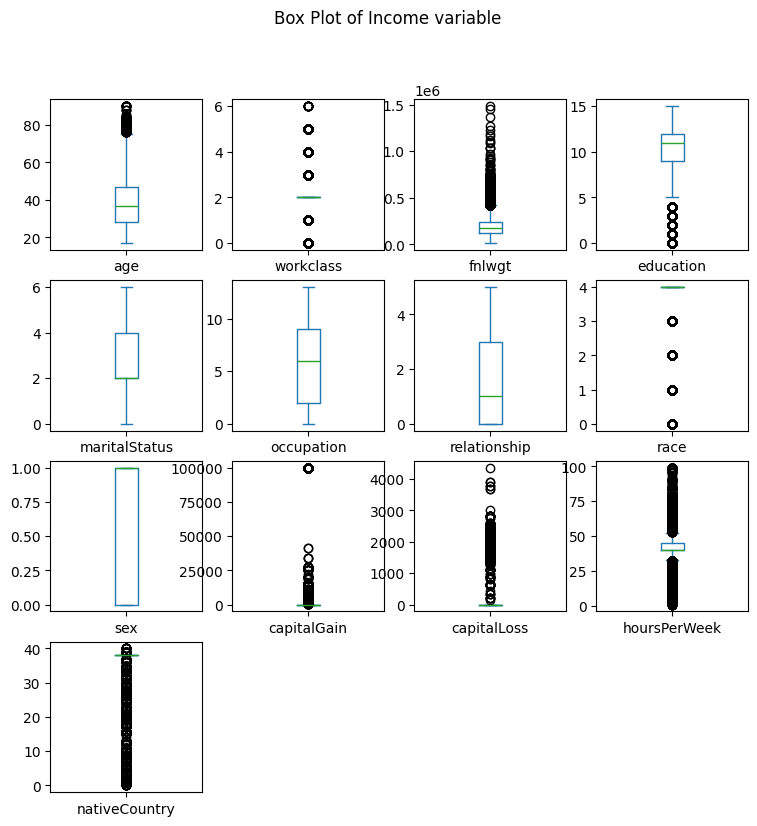

In [44]:
df.drop(['educationNum','Income'],axis = 1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plot of Income variable')

<ipython-input-45-108de09d4ebe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde = False,bins = 50)


<Axes: xlabel='age'>

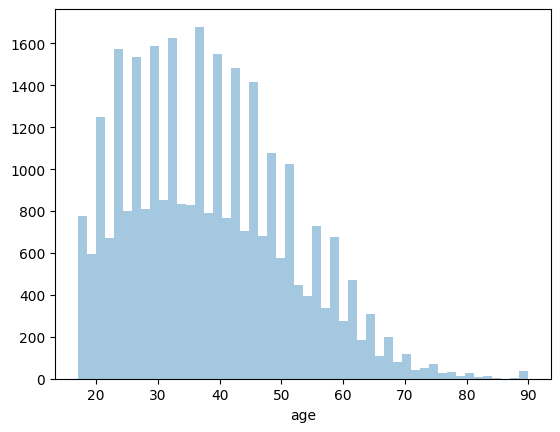

In [45]:

sns.distplot(df['age'],kde = False,bins = 50)

<ipython-input-46-cecb127622f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['educationNum'],kde = False)


<Axes: xlabel='educationNum'>

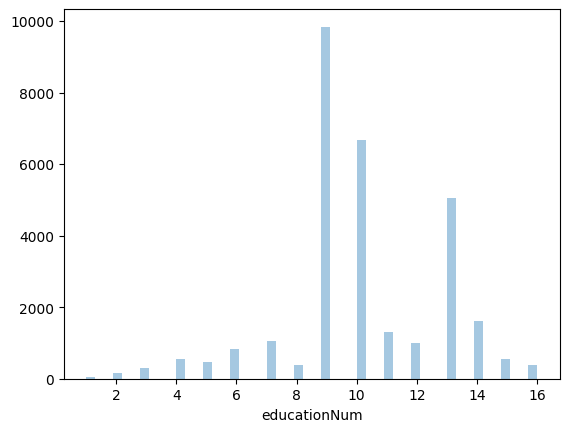

In [46]:
sns.distplot(df['educationNum'],kde = False)

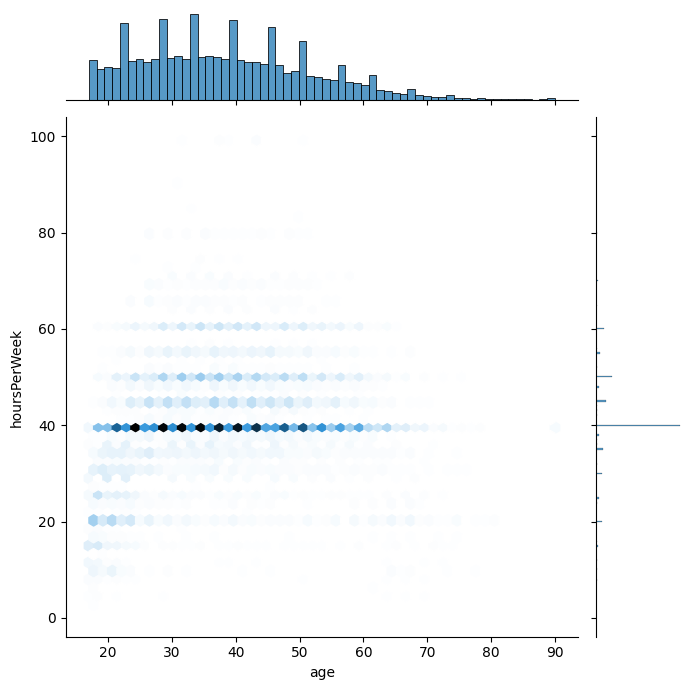

In [49]:
sns.jointplot(x ="age", y="hoursPerWeek", data=df,kind="hex", height = 7)
#sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
#kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

In [50]:
#The hours.per week value of most of the people is 40

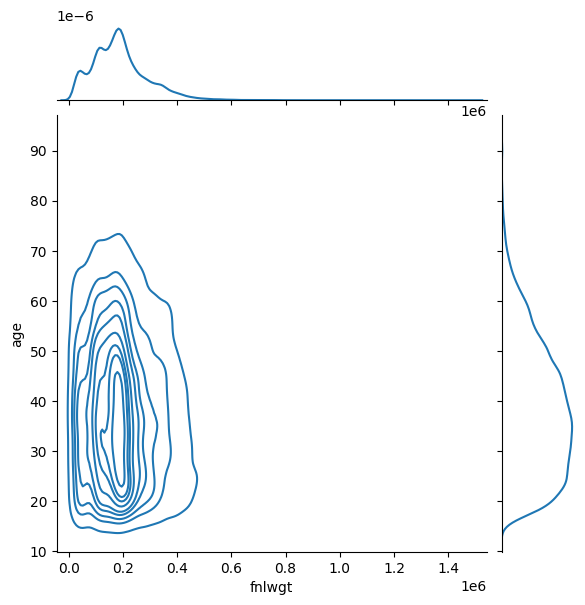

In [51]:
sns.jointplot(x="fnlwgt", y="age", data=df, kind="kde")

In [53]:
#The fnlwgt values are moslty in the range of 0-40,000 and are of age 20 to 40

<Axes: >

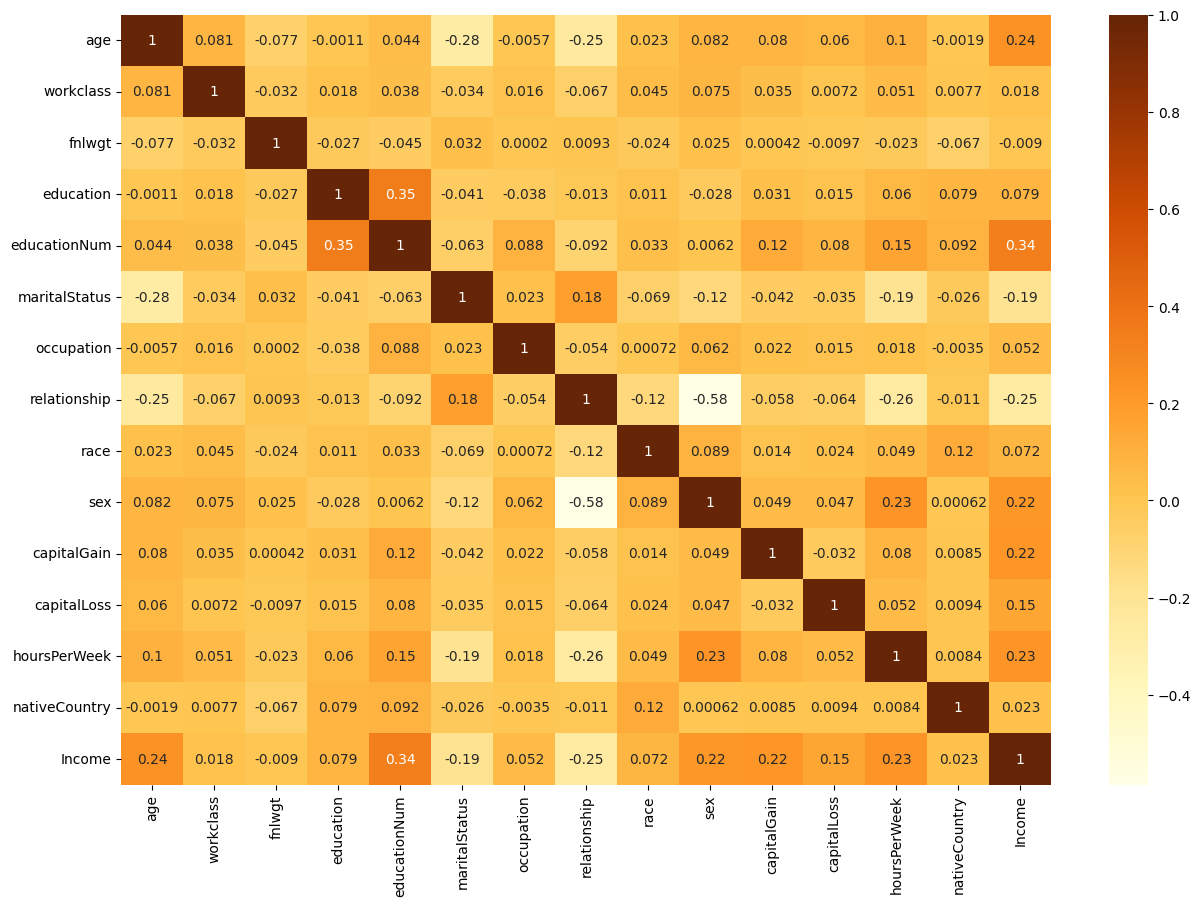

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlOrBr')

In [55]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [56]:
#From the above correlation matrix remove the unneccesary column which have least significant correlation with the target varaible "Income
df1 = df.drop(['fnlwgt','education', 'capitalLoss','nativeCountry'],axis=1)
df1

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


In [57]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


<Axes: >

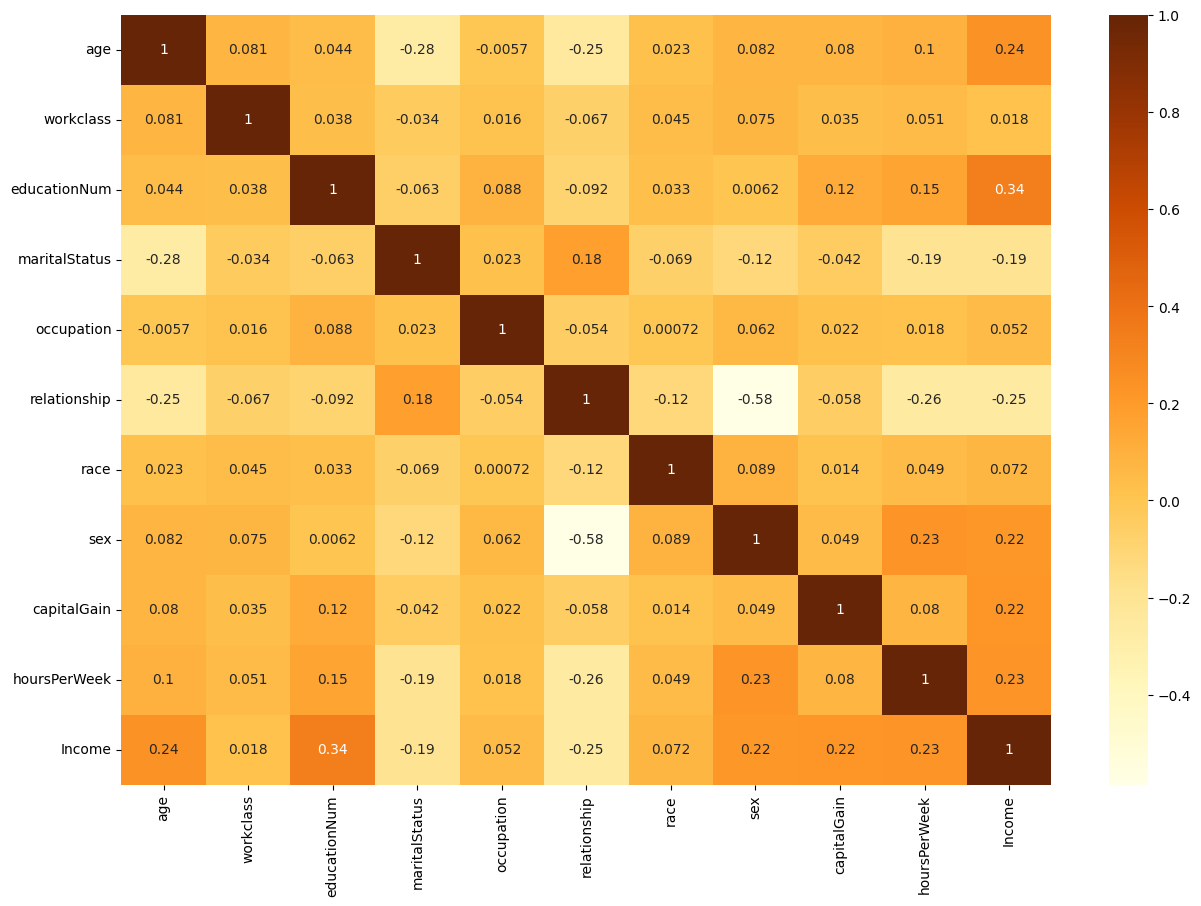

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap = 'YlOrBr')

In [59]:
df1

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


In [60]:
#Network 1
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [61]:
Y = df1['Income']
df1['Income'].value_counts()

,count
Income,
0,22654
1,7508


In [62]:
X = df1.drop(['Income'],axis=1)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [65]:
X_train.shape

(21113, 10)

In [66]:
X_test.shape

(9049, 10)

In [67]:
Y_test.shape

(9049,)

In [68]:
Y_train.shape

(21113,)

In [69]:
Y_test= np.array(Y_test).reshape(-1,1)
Y_test.shape

(9049, 1)

In [70]:
Y_train= np.array(Y_train).reshape(-1,1)
Y_train.shape

(21113, 1)

In [71]:
from keras.layers import InputLayer

In [73]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7088 - loss: 36.4822
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 8.2549
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 5.0105
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 4.5433
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7411 - loss: 3.1216
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7457 - loss: 2.6008
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7466 - loss: 1.9017
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7659 - loss: 1.2860
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 1.2290
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7585 - loss: 1.0723


In [76]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [78]:
cm

array([[3082, 3717],
       [ 899, 1351]])

In [79]:
from sklearn.metrics import f1_score

In [80]:
f1_score(Y_test, y_pred)

0.3692265646351462

In [81]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [82]:
precision_score(Y_test, y_pred)

0.26657458563535913

In [83]:
recall_score(Y_test, y_pred)

0.6004444444444444

In [85]:

#Network 2
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4792 - loss: 94.3719 
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 10.1536
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - loss: 12.9434
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - loss: 10.6744
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - loss: 10.4275
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - loss: 10.0830
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6989 - loss: 8.9167
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - loss: 9.1212
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss: 7.7750
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 7.3604


In [88]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [90]:
cm

array([[5190, 1609],
       [1140, 1110]])

In [91]:
from sklearn.metrics import f1_score

In [92]:
f1_score(Y_test, y_pred)

0.4467699738377943

In [93]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [94]:
precision_score(Y_test, y_pred)

0.4082383229128356

In [95]:
recall_score(Y_test, y_pred)

0.49333333333333335